# K-Nearest Neighbors (KNN)

Este notebook explica el algoritmo K-Nearest Neighbors (KNN), uno de los algoritmos de aprendizaje supervisado más simples e intuitivos.

## ¿Qué es KNN?

K-Nearest Neighbors es un algoritmo de aprendizaje supervisado que puede usarse tanto para clasificación como para regresión. Es un algoritmo "lazy" (perezoso) porque no aprende un modelo explícito, sino que almacena todos los datos de entrenamiento y hace predicciones basándose en la similitud con los ejemplos más cercanos.

## Conceptos Fundamentales

- **K**: Número de vecinos más cercanos a considerar
- **Distancia**: Métrica para medir la similitud entre puntos (Euclidiana, Manhattan, etc.)
- **Votación**: En clasificación, la clase más común entre los K vecinos
- **Promedio**: En regresión, el promedio de los valores de los K vecinos


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


## Implementación Básica de KNN

El algoritmo KNN funciona de la siguiente manera:

1. **Almacenar** todos los datos de entrenamiento
2. **Calcular distancias** entre el punto a predecir y todos los puntos de entrenamiento
3. **Seleccionar** los K puntos más cercanos
4. **Predecir**:
   - **Clasificación**: Clase más común entre los K vecinos
   - **Regresión**: Promedio de los valores de los K vecinos


In [2]:
class KNNClassifier:
    """Implementación básica de KNN para clasificación"""
    
    def __init__(self, k=3):
        """
        Parámetros:
        - k: Número de vecinos a considerar
        """
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """Almacena los datos de entrenamiento"""
        self.X_train = X
        self.y_train = y
    
    def euclidean_distance(self, x1, x2):
        """Calcula la distancia euclidiana entre dos puntos"""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        """Predice las clases para los puntos en X"""
        predictions = []
        for x in X:
            # Calcular distancias a todos los puntos de entrenamiento
            distances = [self.euclidean_distance(x, x_train) 
                        for x_train in self.X_train]
            
            # Obtener índices de los k vecinos más cercanos
            k_indices = np.argsort(distances)[:self.k]
            
            # Obtener las clases de los k vecinos más cercanos
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            
            # Votación: clase más común
            most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(most_common)
        
        return np.array(predictions)


## KNN para Clasificación


In [7]:
# Cargar dataset de iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Usar nuestra implementación
knn_custom = KNNClassifier(k=3)
knn_custom.fit(X_train, y_train)
y_pred_custom = knn_custom.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Precisión con implementación propia (k=3): {accuracy_custom:.4f}")

# Usar scikit-learn para comparar
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Precisión con scikit-learn (k=3): {accuracy_sklearn:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_sklearn, target_names=iris.target_names))


Precisión con implementación propia (k=3): 1.0000
Precisión con scikit-learn (k=3): 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## KNN para Regresión


In [4]:
class KNNRegressor:
    """Implementación básica de KNN para regresión"""
    
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.euclidean_distance(x, x_train) 
                        for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_values = [self.y_train[i] for i in k_indices]
            # Promedio de los k vecinos más cercanos
            predictions.append(np.mean(k_nearest_values))
        return np.array(predictions)

# Ejemplo con datos de regresión
X_reg, y_reg = datasets.make_regression(n_samples=100, n_features=1, 
                                        noise=10, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Usar nuestra implementación
knn_reg_custom = KNNRegressor(k=5)
knn_reg_custom.fit(X_train_reg, y_train_reg)
y_pred_reg_custom = knn_reg_custom.predict(X_test_reg)

# Usar scikit-learn
knn_reg_sklearn = KNeighborsRegressor(n_neighbors=5)
knn_reg_sklearn.fit(X_train_reg, y_train_reg)
y_pred_reg_sklearn = knn_reg_sklearn.predict(X_test_reg)

from sklearn.metrics import mean_squared_error, r2_score

mse_custom = mean_squared_error(y_test_reg, y_pred_reg_custom)
r2_custom = r2_score(y_test_reg, y_pred_reg_custom)
print(f"Implementación propia - MSE: {mse_custom:.4f}, R²: {r2_custom:.4f}")

mse_sklearn = mean_squared_error(y_test_reg, y_pred_reg_sklearn)
r2_sklearn = r2_score(y_test_reg, y_pred_reg_sklearn)
print(f"Scikit-learn - MSE: {mse_sklearn:.4f}, R²: {r2_sklearn:.4f}")


Implementación propia - MSE: 107.8962, R²: 0.9384
Scikit-learn - MSE: 107.8962, R²: 0.9384


## Efecto del Valor de K

El valor de K es crucial para el rendimiento del algoritmo:
- **K pequeño**: Más sensible al ruido, puede sobreajustarse
- **K grande**: Más suave, pero puede perder detalles importantes


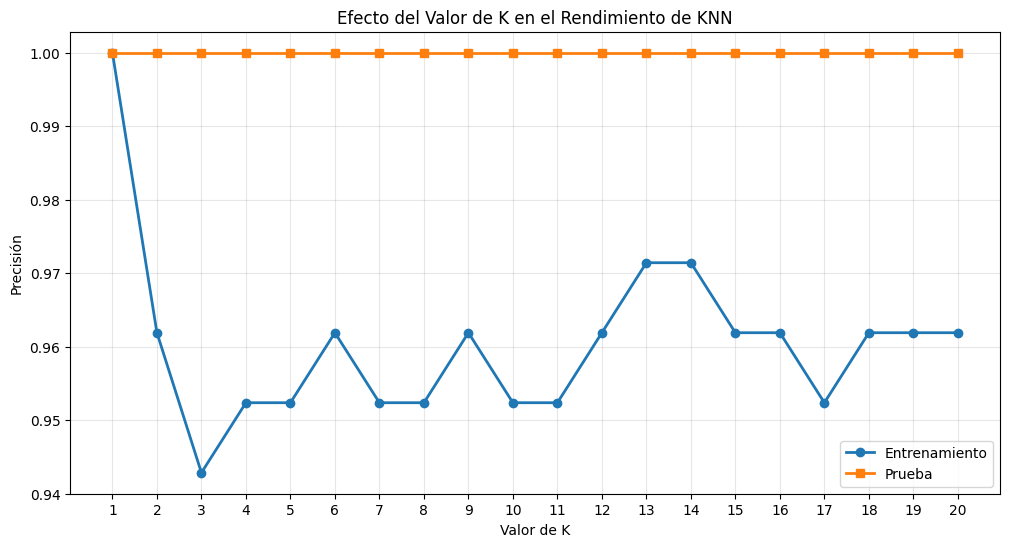

Mejor valor de K: 1 (Precisión: 1.0000)


In [5]:
# Probar diferentes valores de K
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, 'o-', label='Entrenamiento', linewidth=2)
plt.plot(k_values, test_scores, 's-', label='Prueba', linewidth=2)
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Efecto del Valor de K en el Rendimiento de KNN')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Encontrar el mejor K
best_k = k_values[np.argmax(test_scores)]
print(f"Mejor valor de K: {best_k} (Precisión: {max(test_scores):.4f})")


## Métricas de Distancia

KNN puede usar diferentes métricas de distancia:

- **Euclidiana**: `√(Σ(xi - yi)²)` - Distancia en línea recta
- **Manhattan**: `Σ|xi - yi|` - Distancia en cuadrícula
- **Minkowski**: Generalización de las anteriores
- **Hamming**: Para datos categóricos


Euclidean: 1.0000
Manhattan: 1.0000
Minkowski: 1.0000


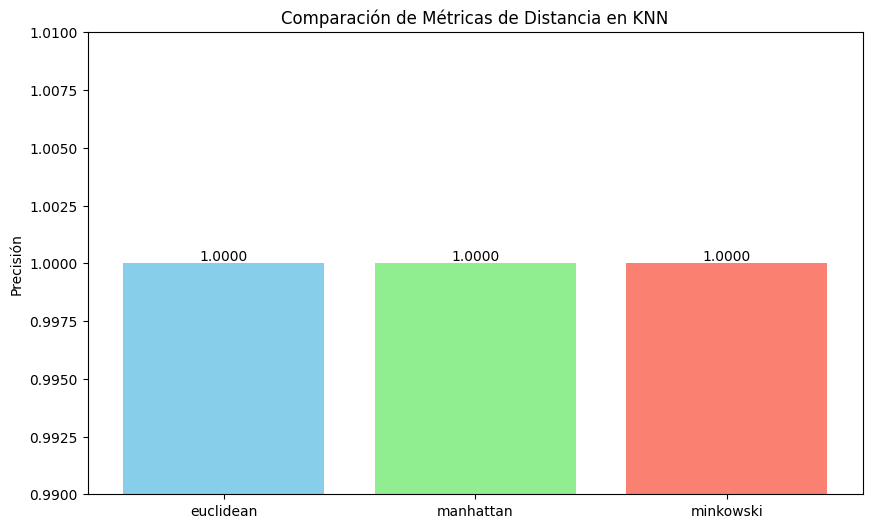

In [6]:
# Comparar diferentes métricas de distancia
metrics = ['euclidean', 'manhattan', 'minkowski']
results = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    results[metric] = score
    print(f"{metric.capitalize()}: {score:.4f}")

# Visualizar
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Precisión')
plt.title('Comparación de Métricas de Distancia en KNN')
plt.ylim([min(results.values()) - 0.01, max(results.values()) + 0.01])
for metric, score in results.items():
    plt.text(metric, score, f'{score:.4f}', ha='center', va='bottom')
plt.show()


## Ventajas y Desventajas

**Ventajas:**
- Simple de entender e implementar
- No requiere entrenamiento (lazy learning)
- Funciona bien con datos no lineales
- Puede usarse para clasificación y regresión

**Desventajas:**
- Computacionalmente costoso en predicción (calcula todas las distancias)
- Sensible a características irrelevantes
- Requiere normalización de datos
- No funciona bien con datos de alta dimensionalidad (curse of dimensionality)
- Sensible a datos desbalanceados

## Aplicaciones

- Reconocimiento de patrones
- Sistemas de recomendación
- Clasificación de imágenes
- Análisis de datos médicos
- Detección de anomalías
